# Practice Session Kernel SVM

## 1. Synthetic data

#### 1.  Generate n = 900 two-moons samples

In [1]:
from sklearn.datasets import make_moons

n = 900
X, Y = make_moons(n_samples=n, noise=0.25, random_state=42)

#### 2. Split the data into respectively training (Xtrain, Ytrain), validation (Xval, Yval), and test sets (Xtest, Ytest) of equal size.

In [2]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y)
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, shuffle=True, test_size=1/2, stratify=Y)

Xval.shape,Yval.shape

((450, 2), (450,))

#### 3. Visualize the training samples and check that you will need a non-linear decision function.

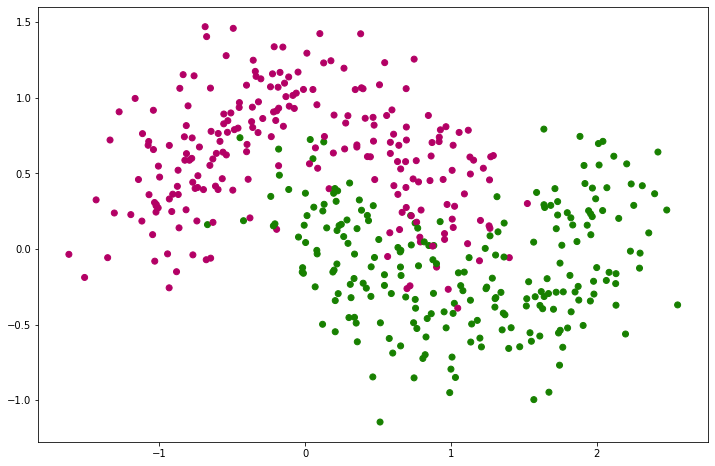

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.PiYG
cm_bright = ListedColormap(["#b30065", "#178000"])
plt.figure(figsize=(12,8))
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain, cmap=cm_bright)

#### 4. Let design a non-linear SVM.
    (a) Let define the non-linear SVM using a rbf (also termed as gaussian) kernel k(x, z) = exp−γ||kx−zk||^2 . We arbitrary set γ = 0.1 and the hyper-parameter C of SVM as C = 10.

In [4]:
from sklearn.svm import SVC

clfker = SVC(kernel="rbf") # SVM with rbf kernel

# set parameters gamma and C
clfker.gamma = 0.1
clfker.C = 10

    (b) The model being specified, let learn its parameters (the αi). Plot the decision frontier and comment the obtained curve. Is is satisfactory ?

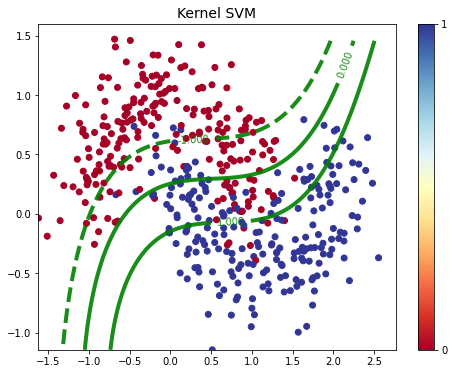

In [5]:
clfker.fit(Xtrain, Ytrain)

# Plot decision frontier
from utility_svm import plot_decision_regions_2d

plot_decision_regions_2d(Xtrain, Ytrain, clfker, 0.02, title="Kernel SVM")

It is not satisfactory. A lot of data is ugly or even bad. 

#### 5. We aim to analyzing the influence of the kernel parameter γ. For the sake, vary γ in {10−2, 10−1, 1, 10, 100}, fit the corresponding SVM, visualize and comment on how the decision frontier changes. Especially for small and large values of γ justify the shape of the decision frontier.

For gamma =  0.001
For gamma =  0.01
For gamma =  1
For gamma =  10
For gamma =  100


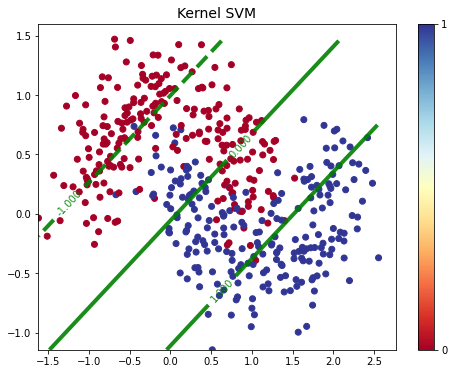

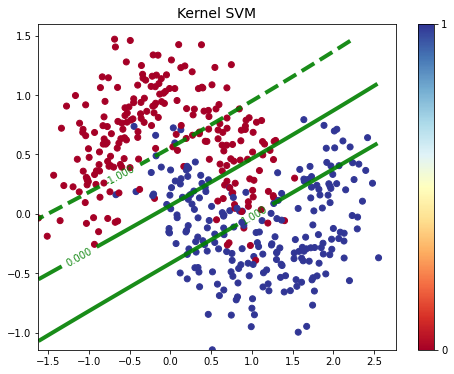

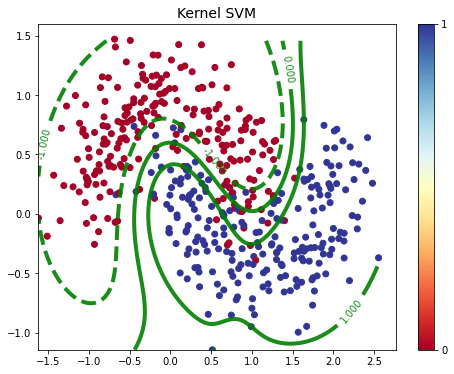

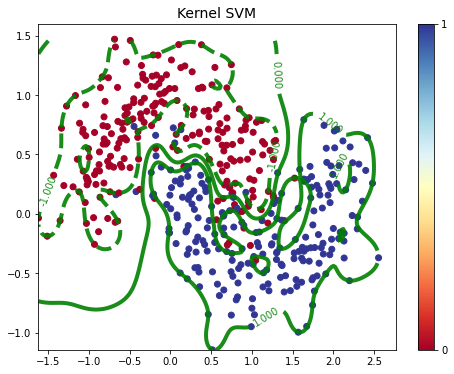

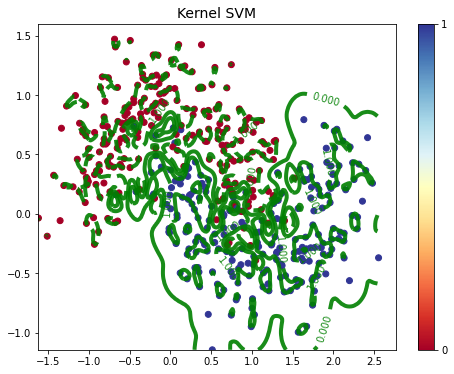

In [6]:
gamma = [0.001,0.01,1,10,100]

for i in gamma : 
    clfker.gamma = i
    clfker.fit(Xtrain, Ytrain)
    print('For gamma = ',i)
    plot_decision_regions_2d(Xtrain, Ytrain, clfker, 0.02, title="Kernel SVM")


For gamma really small, the decision frontier is straight, as if it was linear. For gamma = 1, the result are satisfactory, we can clearly dictinct 2 classes. When gamma is really big, the shape is really detailed which makes it messy and unclear. 

#### 6. To tune appropriately our SVM, we require to set the ”optimal” values of C and γ. As for the previous practical sessions, let apply the validation procedure. Select C in the logarithmic range {10e−3, · · · , 10e2} and γ in {10e−2, · · · , 10e2} For each pair of (C, γ), train a SVM model, compute the error rate on validation set.

#### Plot the obtained error rates. What is the optimal pair (Copt, γopt) to select ?

In [7]:
from sklearn.metrics import accuracy_score
import numpy as np

# Ranges of C and Gamma
vectC = np.logspace(-3, 2, 6)
vectGamma = np.logspace(-2, 2, 5)

err_val = np.empty((vectC.shape[0], vectGamma.shape[0]))


for ind_C, C in enumerate(vectC):
    clfker.C = C
    for ind_gam, paramKer in enumerate(vectGamma):
        clfker.gamma = paramKer
        clfker.fit(Xtrain, Ytrain)
        err_val[ind_C, ind_gam]= 1 - accuracy_score(Yval, clfker.predict(Xval))

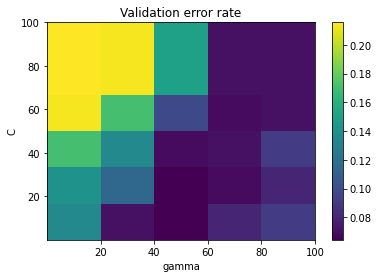

In [8]:
plt.imshow(err_val, extent=[min(vectC),max(vectC),min(vectGamma),max(
vectGamma)],aspect="auto");
plt.colorbar()
plt.xlabel("gamma"); plt.ylabel("C");
plt.title("Validation error rate")
plt.show()

In [9]:
ind_C, ind_gamma = np.unravel_index(np.argmin(err_val), err_val.shape)
Copt = vectC[ind_C]
GammaOpt = vectGamma[ind_gamma]

print('C_opt is ',Copt,' and gamma_opt is ',GammaOpt )

C_opt is  10.0  and gamma_opt is  1.0


#### 7. Thereon, train your optimal kernel SVM and evaluate its performance either on training or test set. Visualize the decision border and comment the results.

0.06444444444444442

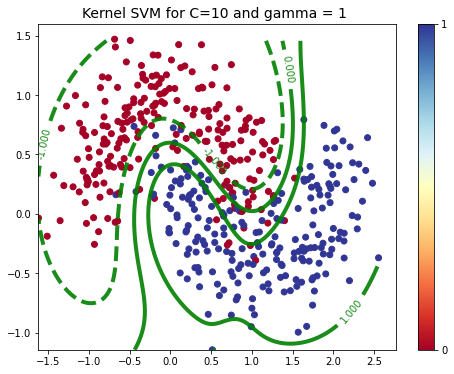

In [10]:
clfker.gamma = GammaOpt
clfker.C = Copt

clfker.fit(Xtrain, Ytrain)

plot_decision_regions_2d(Xtrain, Ytrain, clfker, 0.02, title="Kernel SVM for C=10 and gamma = 1 ")

err_val = 1 - accuracy_score(Yval, clfker.predict(Xval))
err_val

The results are satisfactory. We can cleary see the to Classes and there are fewer ugly and bad points.

#### 8. Bonus : repeat questions 4-7 for the polynomial kernel k(x, z) = (1 + x>z) degree. Vary degree in {1, 2, 3, 4, 5, 6, 7}. Beware to set coef0 = 1 in SVC. The polynomial kernel SVM has to be defined as SVC(kernel="poly", gamma="scale" , coef0=1)

For degree =  1
For degree =  2
For degree =  3
For degree =  4
For degree =  5
For degree =  6
For degree =  7


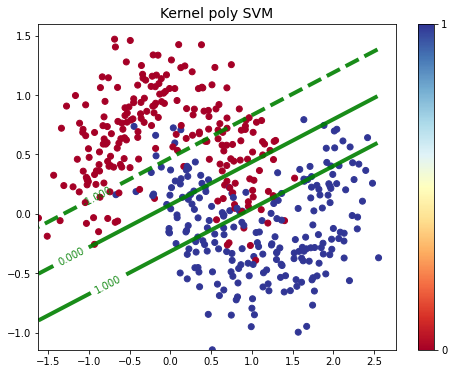

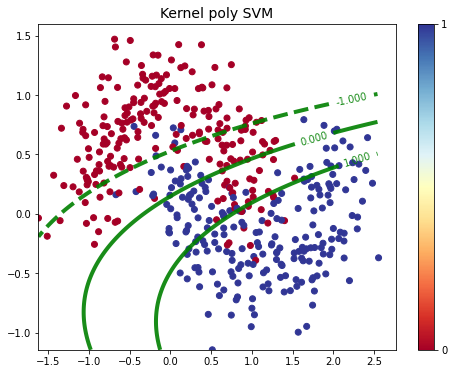

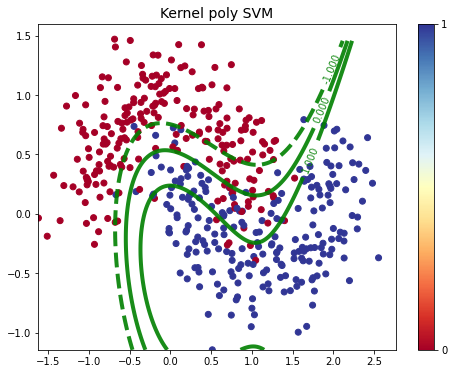

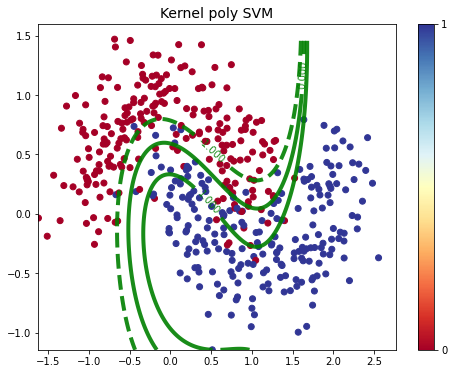

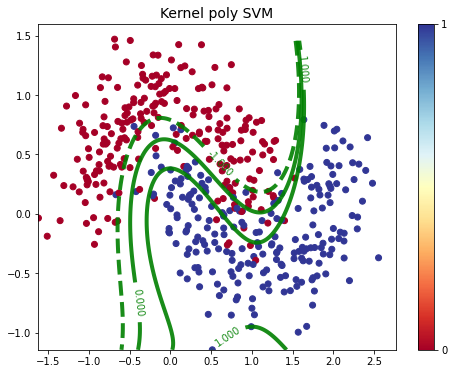

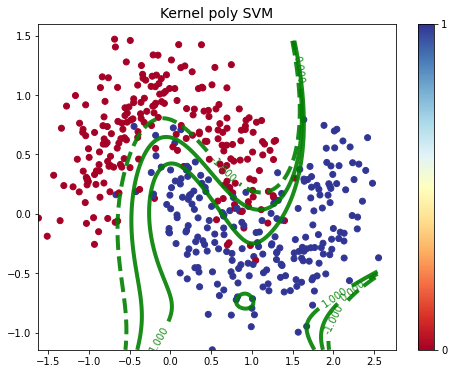

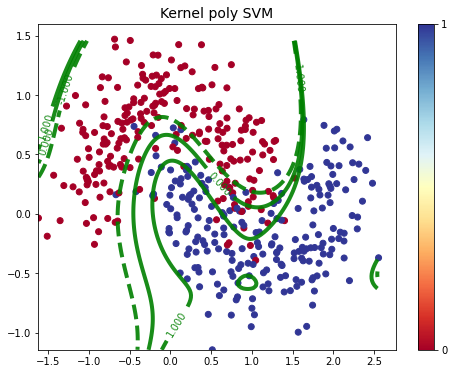

In [22]:
clfker = SVC(kernel="poly", gamma="scale" , coef0=1)
degree = np.array([1,2,3,4,5,6,7])
err_val = np.empty((degree.shape[0]))


for indD,d in enumerate(degree) : 
    clfker.degree = d
    clfker.fit(Xtrain, Ytrain)
    print('For degree = ',d)
    plot_decision_regions_2d(Xtrain, Ytrain, clfker, 0.02, title="Kernel poly SVM")
    err_val[indD]= 1 - accuracy_score(Yval, clfker.predict(Xval))   

In [26]:
degree[np.argmin(err_val)]

print('It is when the degree is ',degree[np.argmin(err_val)],' that the decision frontier seems to be the best.')

It is when the degree is  3  that the decision frontier seems to be the best.



## 2 Spam Classification

#### 1. Read the files and extract the inputs X and the output Y (last column in the dataset).

In [12]:
dataspam = np.loadtxt("spambase.data", delimiter=",")
features_name = np.genfromtxt("spambase_variables.csv", delimiter=",", dtype="str")
features_name = features_name[:,0]
# get the inputs
X = dataspam[:,0:57]
# extract the output
Y = dataspam[:,-1]



#### 2. Split the data into training and test sets. The test set size should be 1/3 of the data.

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, shuffle=True, test_size=1/2, stratify=Y)

from sklearn.preprocessing import StandardScaler


sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(X_train)
X_train = sc.transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

#### 3. The goal is to learn a non-linear spam classifier. Design an rbf kernel SVM and evaluate its performances on test set. Highlight the hyper-parameters selection and all the important steps of the model learning and assessment.

#### Compare to the linear SVM results.

In [31]:
clfker = SVC(kernel="rbf") # SVM with rbf kernel

# set parameters gamma and C
clfker.gamma = 0.1
clfker.C = 10

# Ranges of C and Gamma
vectC = np.logspace(-3, 2, 6)
vectGamma = np.logspace(-2, 2, 6)
err_val = np.empty((vectC.shape[0], vectGamma.shape[0]))

for ind_C, C in enumerate(vectC):
    clfker.C = C
    for ind_gam, paramKer in enumerate(vectGamma):
        clfker.gamma = paramKer
        clfker.fit(X_train, Y_train)
        err_val[ind_C, ind_gam]= 1 - accuracy_score(Y_val, clfker.predict(X_val))

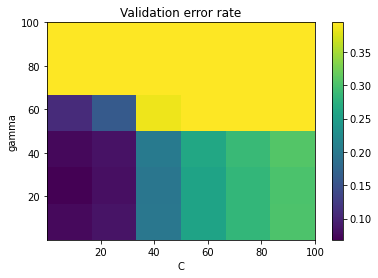

In [32]:
plt.imshow(err_val, extent=[min(vectC),max(vectC),min(vectGamma),max(
vectGamma)],aspect="auto");
plt.colorbar()
plt.xlabel("C"); plt.ylabel("gamma");
plt.title("Validation error rate")
plt.show()

In [33]:
ind_C, ind_gamma = np.unravel_index(np.argmin(err_val), err_val.shape)
Copt = vectC[ind_C]
GammaOpt = vectGamma[ind_gamma]

print('C_opt is ',Copt,' and gamma_opt is ',GammaOpt )

C_opt is  10.0  and gamma_opt is  0.01


In [34]:
clfker.gamma = GammaOpt
clfker.C = Copt

clfker.fit(X_train, Y_train)

err_val = 1 - accuracy_score(Y_val, clfker.predict(X_val))
err_val

0.06823120382442416

The result are satisfactory, the error rate is low, and lower than the one of the last TP with the linear SVM. 